# INFS3208 Individual Project
# Big data analysis of aviation services based on Skytrax user review dataset

# PART 2

# 45659016 Yulin Wu

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, FloatType, IntegerType

In [3]:
schema_lounge = StructType([
    StructField("airline_name", StringType(), True),
    StructField("link", StringType(), True),
    StructField("title", StringType(), True),
    StructField("author", StringType(), True),
    StructField("author_country", StringType(), True),
    StructField("date", StringType(), True),
    StructField("content", StringType(), True),
    StructField("lounge_name", StringType(), True),
    StructField("airport", StringType(), True),
    StructField("lounge_type", StringType(), True),
    StructField("date_visit", StringType(), True),
    StructField("type_traveller", StringType(), True),
    StructField("overall_rating", FloatType(), True),
    StructField("comfort_rating", IntegerType(), True),
    StructField("cleanliness_rating", IntegerType(), True),
    StructField("bar_beverages_rating", FloatType(), True),
    StructField("catering_rating", FloatType(), True),
    StructField("washrooms_rating", FloatType(), True),
    StructField("wifi_connectivity_rating", FloatType(), True),
    StructField("staff_service_rating", FloatType(), True),
    StructField("recommended", IntegerType(), True)
])

schema_airline = StructType([
    StructField("airline_name", StringType(), True),
    StructField("link", StringType(), True),
    StructField("title", StringType(), True),
    StructField("author", StringType(), True),
    StructField("author_country", StringType(), True),
    StructField("date", StringType(), True),
    StructField("content", StringType(), True),
    StructField("aircraft", StringType(), True),
    StructField("type_traveller", StringType(), True),
    StructField("cabin_flown", StringType(), True),
    StructField("route", StringType(), True),
    StructField("overall_rating", FloatType(), True),
    StructField("seat_comfort_rating", FloatType(), True),
    StructField("cabin_staff_rating", FloatType(), True),
    StructField("food_beverages_rating", FloatType(), True),
    StructField("inflight_entertainment_rating", FloatType(), True),
    StructField("ground_service_rating", FloatType(), True),
    StructField("wifi_connectivity_rating", FloatType(), True),
    StructField("value_money_rating", FloatType(), True),
    StructField("recommended", IntegerType(), True)
])


schema_airport = StructType([
    StructField("airport_name", StringType(), True),
    StructField("link", StringType(), True),
    StructField("title", StringType(), True),
    StructField("author", StringType(), True),
    StructField("author_country", StringType(), True),
    StructField("date", StringType(), True),
    StructField("content", StringType(), True),
    StructField("experience_airport", StringType(), True),
    StructField("date_visit", StringType(), True),
    StructField("type_traveller", StringType(), True),
    StructField("overall_rating", FloatType(), True),
    StructField("queuing_rating", FloatType(), True),
    StructField("terminal_cleanliness_rating", FloatType(), True),
    StructField("terminal_seating_rating", FloatType(), True),
    StructField("terminal_signs_rating", FloatType(), True),
    StructField("food_beverages_rating", FloatType(), True),
    StructField("airport_shopping_rating", FloatType(), True),
    StructField("wifi_connectivity_rating", FloatType(), True),
    StructField("airport_staff_rating", FloatType(), True),
    StructField("recommended", IntegerType(), True)
])


schema_seat = StructType([
    StructField("airline_name", StringType(), True),
    StructField("link", StringType(), True),
    StructField("title", StringType(), True),
    StructField("author", StringType(), True),
    StructField("author_country", StringType(), True),
    StructField("date", StringType(), True),
    StructField("content", StringType(), True),
    StructField("aircraft", StringType(), True),
    StructField("seat_layout", StringType(), True),
    StructField("date_flown", StringType(), True),
    StructField("cabin_flown", StringType(), True),
    StructField("type_traveller", StringType(), True),
    StructField("overall_rating", FloatType(), True),
    StructField("seat_legroom_rating", FloatType(), True),
    StructField("seat_recline_rating", FloatType(), True),
    StructField("seat_width_rating", FloatType(), True),
    StructField("aisle_space_rating", FloatType(), True),
    StructField("viewing_tv_rating", FloatType(), True),
    StructField("power_supply_rating", FloatType(), True),
    StructField("seat_storage_rating", FloatType(), True),
    StructField("recommended", IntegerType(), True)
])



In [4]:
spark = SparkSession.builder\
.appName("k-mean")\
.getOrCreate()

In [49]:
seat_df = spark.read.csv("hdfs://namenode:9000/raw/seat.csv", header=True, schema=schema_seat)
airline_df = spark.read.csv("hdfs://namenode:9000/raw/airline.csv", header=True, schema=schema_airline)
lounge_df = spark.read.csv("hdfs://namenode:9000/raw/lounge.csv", header=True, schema=schema_lounge)
airport_df = spark.read.csv("hdfs://namenode:9000/raw/airport.csv", header=True, schema=schema_airport)

seat_df = seat_df.withColumn("recommended", when(col("recommended").isin("0", "1"), col("recommended")).otherwise(None))

In [50]:
lounge_df.printSchema()
airline_df.printSchema()
seat_df.printSchema()
airport_df.printSchema()

root
 |-- airline_name: string (nullable = true)
 |-- link: string (nullable = true)
 |-- title: string (nullable = true)
 |-- author: string (nullable = true)
 |-- author_country: string (nullable = true)
 |-- date: string (nullable = true)
 |-- content: string (nullable = true)
 |-- lounge_name: string (nullable = true)
 |-- airport: string (nullable = true)
 |-- lounge_type: string (nullable = true)
 |-- date_visit: string (nullable = true)
 |-- type_traveller: string (nullable = true)
 |-- overall_rating: float (nullable = true)
 |-- comfort_rating: integer (nullable = true)
 |-- cleanliness_rating: integer (nullable = true)
 |-- bar_beverages_rating: float (nullable = true)
 |-- catering_rating: float (nullable = true)
 |-- washrooms_rating: float (nullable = true)
 |-- wifi_connectivity_rating: float (nullable = true)
 |-- staff_service_rating: float (nullable = true)
 |-- recommended: integer (nullable = true)

root
 |-- airline_name: string (nullable = true)
 |-- link: string (

In [51]:
#lounge_df.describe().show()

In [52]:

lounge_df.select("recommended").distinct().show()
airline_df.select("recommended").distinct().show()
seat_df.select("recommended").distinct().show()
airport_df.select("recommended").distinct().show()


+-----------+
|recommended|
+-----------+
|       null|
|          1|
|          0|
+-----------+

+-----------+
|recommended|
+-----------+
|       null|
|          1|
|          0|
+-----------+

+-----------+
|recommended|
+-----------+
|       null|
|          1|
|          0|
+-----------+

+-----------+
|recommended|
+-----------+
|       null|
|          1|
|          0|
+-----------+



In [53]:
from pyspark.sql.functions import col, isnan, isnull, count, when, round

"""
/*
The code snippet (PySpark Missing Data Imputation – How to handle missing values in PySpark) below has been adapted from
https://www.machinelearningplus.com/pyspark/pyspark-missing-data-imputation/
I have changed adjusted the loop functionality
*/


"""
def calculate_missing_percentage(df, table_name):
    # Count the total number of rows in the DataFrame to use for calculating percentages
    total_rows = df.count()

    # Aggregate the DataFrame to count missing (null or NaN) entries per column
    missing_count_df = df.agg(*[count(when(isnull(c) | isnan(c), c)).alias(c) for c in df.columns])

    # Collect the missing counts into a dictionary
    missing_count = missing_count_df.collect()[0].asDict()

    # Calculate the percentage of missing data for each column and filter out columns with no missing data
    missing_percentage = {column: (value / total_rows) * 100 for column, value in missing_count.items() if value > 0}

    # Check if the missing_percentage dictionary is empty, which means there is no missing data
    if not missing_percentage:
        print(f"Table: {table_name}")
        # Return a DataFrame with a message about no missing data
        print("No missing data.")
        missing_percent = spark.createDataFrame([("No missing data", 0)], ["Variables", "Percent_Missing"])
    else:
        print(f"Table: {table_name}")
        # Create a DataFrame from the missing percentage dictionary
        missing_percentage_df = spark.createDataFrame([(k, v) for k, v in missing_percentage.items()], ["Variables", "Percent_Missing"])

        # Round the percentage values to two decimal places and sort by descending order
        missing_percent = missing_percentage_df.withColumn("Percent_Missing", round(missing_percentage_df["Percent_Missing"], 2))
        missing_percent = missing_percent.sort("Percent_Missing", ascending=False)

    missing_percent.show()

    
calculate_missing_percentage(lounge_df, "Lounge Data")
calculate_missing_percentage(airline_df, "Airline Data")
calculate_missing_percentage(airport_df, "Airport Data")
calculate_missing_percentage(seat_df, "Seat Data")

Table: Lounge Data
+--------------------+---------------+
|           Variables|Percent_Missing|
+--------------------+---------------+
|          date_visit|           95.3|
|      type_traveller|          94.77|
|      author_country|          21.36|
|         lounge_type|          13.67|
|             airport|           4.62|
|    washrooms_rating|           1.93|
|wifi_connectivity...|           1.32|
|staff_service_rating|           1.23|
|bar_beverages_rating|           1.01|
|         recommended|           0.97|
|     catering_rating|           0.92|
|  cleanliness_rating|           0.84|
|      comfort_rating|           0.79|
|      overall_rating|           0.79|
|         lounge_name|           0.57|
|              author|           0.26|
|                date|           0.13|
|             content|           0.09|
|                link|           0.04|
|               title|           0.04|
+--------------------+---------------+

Table: Airline Data
+--------------------+--

# data cleaning

In [54]:
# Remove columns with many missing values and unnecessary columns 
lounge_df_cleaned = lounge_df.drop("link", "title", "author", "author_country", "date", "content", "date_visit", "type_traveller", "lounge_type", "airport", "lounge_name")

airline_df_cleaned = airline_df.drop("link", "title", "author", "author_country", "date", "content", "wifi_connectivity_rating", "aircraft", "ground_service_rating", "route", "type_traveller", "cabin_flown")

airport_df_cleaned = airport_df.drop("link", "title", "author", "author_country", "date", "content", "airport_staff_rating", "terminal_signs_rating", "wifi_connectivity_rating", "terminal_seating_rating", "food_beverages_rating", "date_visit", "experience_airport", "type_traveller")

seat_df_cleaned = seat_df.drop("link", "title", "author", "author_country", "content", "date_flown", "type_traveller", "power_supply_rating", "seat_storage_rating", "aircraft", "seat_layout")


In [55]:
from pyspark.sql import functions as F

all_columns = set(lounge_df_cleaned.columns) | set(airline_df_cleaned.columns) | set(airport_df_cleaned.columns) | set(seat_df_cleaned.columns)

lounge_df_aligned = lounge_df_cleaned.select([F.col(c) if c in lounge_df_cleaned.columns else F.lit(None).alias(c) for c in all_columns])
airline_df_aligned = airline_df_cleaned.select([F.col(c) if c in airline_df_cleaned.columns else F.lit(None).alias(c) for c in all_columns])
airport_df_aligned = airport_df_cleaned.select([F.col(c) if c in airport_df_cleaned.columns else F.lit(None).alias(c) for c in all_columns])
seat_df_aligned = seat_df_cleaned.select([F.col(c) if c in seat_df_cleaned.columns else F.lit(None).alias(c) for c in all_columns])

combined_df = lounge_df_aligned.union(airline_df_aligned).union(airport_df_aligned).union(seat_df_aligned)


In [56]:
"""
The code snippet (PySpark Missing Data Imputation – How to handle missing values in PySpark) below has been adapted from
https://www.machinelearningplus.com/pyspark/pyspark-missing-data-imputation/
I have changed using 
"""

from pyspark.sql.types import IntegerType, FloatType, DoubleType

def get_numeric_columns(df):
    return [column.name for column in df.schema.fields if isinstance(column.dataType, (FloatType))]

In [57]:
from pyspark.ml.feature import Imputer

# Function to perform imputation
def impute_missing_values(df):
    numeric_column_names = get_numeric_columns(df)
    
    # Initialize the Imputer
    imputer = Imputer(
        inputCols=numeric_column_names, 
        outputCols=numeric_column_names, 
        strategy="mean"  # Use mean to fill missing values               
    )
    
    # Fit the Imputer
    model = imputer.fit(df)
    
    # Transform the dataset
    imputed_df = model.transform(combined_df)
    
    return imputed_df


In [58]:
imputed_df = impute_missing_values(combined_df)
imputed_df = imputed_df.dropna(subset=["recommended"])

In [59]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import VectorAssembler, StandardScaler

# Loads data.
feature_cols = ['overall_rating', 'seat_comfort_rating', 'cabin_staff_rating', 
                'food_beverages_rating', 'inflight_entertainment_rating', 
                'value_money_rating', 'recommended']

# Create a VectorAssembler to generate a new column called "features"
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

assembler_data = assembler.transform(imputed_df)

# Create a StandardScaler to scale the features vector.
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")

# Fit the scaler on the data and transform the data to include scaled features.
scaler_model = scaler.fit(assembler_data)
scaled_df = scaler_model.transform(assembler_data)

# Split the data into training and testing sets
train_data, test_data = scaled_df.randomSplit([0.7, 0.3], seed=123)

# Trains a k-means model
kmeans = KMeans(featuresCol="scaled_features", predictionCol="prediction").setK(7).setSeed(1)

# Trains a k-means model.
model = kmeans.fit(train_data)

# Make predictions using test data
predictions = model.transform(test_data)

predictions.select("airline_name", "scaled_features", "prediction")
    

DataFrame[airline_name: string, scaled_features: vector, prediction: int]

In [60]:
"""
The code snippet (Elbow Method for optimal value of k in KMeans) below has been adapted from
https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
"""

from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler, StandardScaler

# Elbow Method
costs = []
for k in range(2, 11):
    kmeans = KMeans(featuresCol="scaled_features", k=k)
    
    model = kmeans.fit(scaled_df)
    
    wssse = model.summary.trainingCost
    
    costs.append((k, wssse))

for k, cost in costs:
    print(f"K = {k}, WSSSE = {cost}")


K = 2, WSSSE = 253677.93340330623
K = 3, WSSSE = 194952.2174334882
K = 4, WSSSE = 151370.6232828493
K = 5, WSSSE = 144259.9150924271
K = 6, WSSSE = 128503.96202250531
K = 7, WSSSE = 122010.93978420795
K = 8, WSSSE = 114049.8325115373
K = 9, WSSSE = 109225.59052558304
K = 10, WSSSE = 108926.14198210965


In [61]:
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator(featuresCol="features", metricName="silhouette", distanceMeasure="squaredEuclidean")

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Silhouette with squared euclidean distance = 0.34096356853634086
Cluster Centers: 
[3.21710916 4.8575386  4.28529211 3.9997773  3.84854387 3.91984862
 2.01067938]
[1.24280365e+00 2.98628043e+00 2.88683111e+00 2.41899409e+00
 1.98372416e+00 2.62475836e+00 1.98466372e-03]
[2.50922285 3.88908046 3.27675278 2.55873041 3.36306263 3.32348795
 1.95031861]
[2.96859798 4.05111968 4.14540813 3.59615862 2.22665794 3.74491147
 2.01122889]
[1.0924891  2.59221818 2.53795964 2.2267517  1.8851657  1.08180369
 0.02787544]
[2.88573038 3.88907994 3.97769191 3.42755294 0.24594999 3.62199094
 1.99338409]
[2.53644427 2.95893954 2.97581486 2.46887972 1.98138816 2.88327594
 2.01632383]
[2.62760692 3.54345346 3.5987328  0.40886159 0.66783013 3.47268178
 1.83721566]
[0.94912083 1.43434132 1.25741768 0.94980495 0.93399005 1.17777925
 0.03999361]
[2.99938891 3.60794439 4.19293185 3.81594352 3.68818961 3.72882995
 2.00658037]


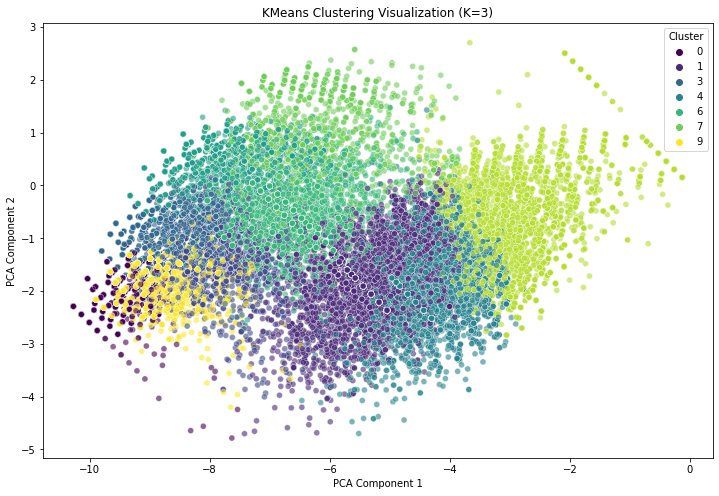

In [62]:
from pyspark.ml.feature import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Perform PCA to reduce dimensionality to 2 dimensions for visualization purposes
pca = PCA(k=2, inputCol="scaled_features", outputCol="pca_features")
pca_model = pca.fit(scaled_df)
pca_result = pca_model.transform(scaled_df)

# Make predictions using the KMeans model on the entire PCA result to get clusters
pca_predictions = model.transform(pca_result)

# Extract necessary columns for visualization
visual_df = pca_predictions.select("pca_features", "prediction", "airline_name", *feature_cols)

# Convert to Pandas DataFrame for visualization purposes
pandas_df = visual_df.toPandas()
# Extract the PCA components for visualization
pandas_df['pca_x'] = pandas_df['pca_features'].apply(lambda x: x[0])
pandas_df['pca_y'] = pandas_df['pca_features'].apply(lambda x: x[1])
pandas_df['cluster'] = pandas_df['prediction']
feature_df = pandas_df.copy()

# Plot the clusters using Seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pandas_df, x='pca_x', y='pca_y', hue='cluster', palette='viridis', alpha=0.6)
plt.title('KMeans Clustering Visualization (K=3)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()



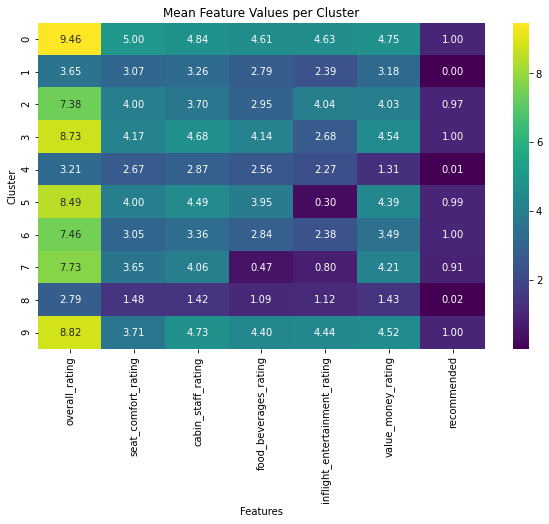

In [63]:
# Calculate mean feature values per cluster
mean_features_per_cluster = feature_df.groupby('cluster').mean().reset_index()

# Plotting a heatmap of mean feature values for each cluster
plt.figure(figsize=(10, 6))
sns.heatmap(mean_features_per_cluster[feature_cols], annot=True, cmap='viridis', fmt=".2f")
plt.title('Mean Feature Values per Cluster')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()
